<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone%5CCapstone_MBA_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Market Basket Analysis to determine the typical combinations of ICD Categories per Claim**

# Import libraries and load dataset

In [ ]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv')

In [ ]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

# Data Prep
Profiling, Cleaning

In [132]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 35.0+ MB


In [133]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [134]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [135]:
# Creating basket of claims by merging claims table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [136]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
 12  icdcategory    382355 non-null  float64
 13  icdgroup       382355 non-null  float64
 14  ICD CODE       382355 non-null  object 
 15  ICD DISEASE    382355 non-null  object 
dtypes: float64(7), int64(6), object(3)
memory usage: 49.6+ MB


In [137]:
claims.isnull().sum()

cbdcode           0
claimcode         0
icdno             0
doctorcode        0
cptno             0
sacode            0
UNIT AMT          0
QTY               0
INCURRED AMT      0
HOSP BILL AMT     0
COVERED AMT       0
BILL TO           0
icdcategory      83
icdgroup         83
ICD CODE         83
ICD DISEASE      83
dtype: int64

In [138]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [139]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

cbdcode          0
claimcode        0
icdno            0
doctorcode       0
cptno            0
sacode           0
UNIT AMT         0
QTY              0
INCURRED AMT     0
HOSP BILL AMT    0
COVERED AMT      0
BILL TO          0
icdcategory      0
icdgroup         0
ICD CODE         0
ICD DISEASE      0
dtype: int64

In [140]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)

In [141]:
# Drop other columns
claims = claims[['claimcode','icdno','icdcategory','ICD CODE','ICD DISEASE']]
claims.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy
1,203913,40054,261,W55,Contact with other mammals
2,203913,40054,261,W55,Contact with other mammals
3,203913,40054,261,W55,Contact with other mammals
4,203913,40054,261,W55,Contact with other mammals


In [142]:
# Check claim with duplicate ICD category 
claims[claims['claimcode']=='203913']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE
1,203913,40054,261,W55,Contact with other mammals
2,203913,40054,261,W55,Contact with other mammals
3,203913,40054,261,W55,Contact with other mammals
4,203913,40054,261,W55,Contact with other mammals
5,203913,40054,261,W55,Contact with other mammals
6,203913,40054,261,W55,Contact with other mammals


In [143]:
# Check number of unique ICD categories in claims
claims['icdcategory'].nunique()

241

In [144]:
241/290

0.8310344827586207

**241 out of 290 or 83% of ICD categories are present in the claims.**

In [145]:
# Removing duplicate ICD categories in claims, since we are only looking at the occurance of the ICD category per claim
claims['claims_icd'] = claims[['claimcode', 'icdcategory']].agg('_'.join, axis=1)
claims_icd = claims.drop_duplicates(subset='claims_icd')

In [146]:
claims['icdcategory'].nunique()

241

In [147]:
# Checking number of ICD categories per claim
claims_icd['claimcode'].value_counts().sort_values(ascending=False)

328555    10
309069    10
305146    10
434764     9
377387     9
          ..
452895     1
452897     1
452902     1
452903     1
658022     1
Name: claimcode, Length: 166947, dtype: int64

In [148]:
claims_icd[claims_icd['claimcode']=='328555']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,claims_icd
201183,328555,12785,130,K76.0,"Fatty (change of) liver, not elsewhere classified",328555_130
201184,328555,46010,158,M81.9,"Osteoporosis, unspecified",328555_158
201186,328555,25106,216,R80.9,"Proteinuria, unspecified",328555_216
201188,328555,3857,54,E11,Type 2 diabetes mellitus,328555_54
201189,328555,14648,144,M06.9,"Rheumatoid arthritis, unspecified",328555_144
201190,328555,4467,61,E87.8,Other disorders of electrolyte and fluid balan...,328555_61
201191,328555,3639,53,E03.9,"Hypothyroidism, unspecified",328555_53
201192,328555,20895,167,N20.9,"Urinary calculus, unspecified",328555_167
201193,328555,10140,105,I25.1,Atherosclerotic heart disease of native corona...,328555_105
201195,328555,10341,107,I49.9,"Cardiac arrhythmia, unspecified",328555_107


In [149]:
# Considering only claims with 2 or more ICD categories
claims_icdcombo = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
claims_icdcombo['claimcode'].value_counts().sum()

38603

In [187]:
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,claims_icd
7815,220945,11745,113,J18.9,"Pneumonia, unspecified organism",220945_113
7822,220945,21009,169,N39.0,"Urinary tract infection, site not specified",220945_169
7828,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,220946_104
7829,220946,3857,54,E11,Type 2 diabetes mellitus,220946_54
7831,220946,11745,113,J18.9,"Pneumonia, unspecified organism",220946_113


In [150]:
38603/166993

0.23116537818950494

**38,603 out of 166,993 or 23% of the claims has 2 or more ICD categories.**

# MBA

## Preparing Transaction List

In [151]:
# Get list ICD Categories by Claim number
transactions = claims_icdcombo.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD DISEASE,claims_icd
0,220945,"113,169","Pneumonia, unspecified organism,Urinary tract ...","220945_113,220945_169"
1,220946,"104,54,113",Essential Hypertension; malignant hypertension...,"220946_104,220946_54,220946_113"
2,230470,"53,54,105","Hypothyroidism, unspecified,Type 2 diabetes me...","230470_53,230470_54,230470_105"
3,232051,"169,53,104","Urinary tract infection, site not specified,Th...","232051_169,232051_53,232051_104"
4,251715,"54,104","Type 2 diabetes mellitus,Essential Hypertensio...","251715_54,251715_104"


In [152]:
transactions['icd'] = transactions['icdcategory'].apply(lambda t: t.split(','))
transactions = transactions['icd']
transactions.head()

0        [113, 169]
1    [104, 54, 113]
2     [53, 54, 105]
3    [169, 53, 104]
4         [54, 104]
Name: icd, dtype: object

In [153]:
transaction_list = list(transactions)
transaction_list[:30]

[['113', '169'],
 ['104', '54', '113'],
 ['53', '54', '105'],
 ['169', '53', '104'],
 ['54', '104'],
 ['97', '100'],
 ['166', '104'],
 ['61', '131'],
 ['104', '55'],
 ['104', '54'],
 ['15', '169', '0'],
 ['113', '55', '53'],
 ['104', '61'],
 ['105', '54'],
 ['108', '170'],
 ['284', '139'],
 ['48', '104'],
 ['104', '55'],
 ['53', '55'],
 ['104', '53'],
 ['104', '61'],
 ['0', '113'],
 ['169', '112'],
 ['108', '104'],
 ['104', '55'],
 ['130', '21', '54', '42', '105', '171', '124'],
 ['112', '105'],
 ['39', '171'],
 ['61', '53', '173', '131', '214', '168'],
 ['53', '105', '152', '61']]

## One Hot Encoding

In [ ]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,0,1,10,100,102,103,104,105,106,107,...,87,88,89,90,91,93,95,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
14334,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14335,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Support Metric

**Support of ICD Categories**

In [ ]:
onehot.mean()

0      0.058516
1      0.011717
10     0.022597
100    0.001186
102    0.000070
         ...   
93     0.001813
95     0.000139
97     0.002162
98     0.000976
99     0.001883
Length: 178, dtype: float64

##Apriori

In [185]:
# Choose max_len
claims_icdcombo['claimcode'].value_counts().describe()

count    14338.000000
mean         2.692356
std          1.020949
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

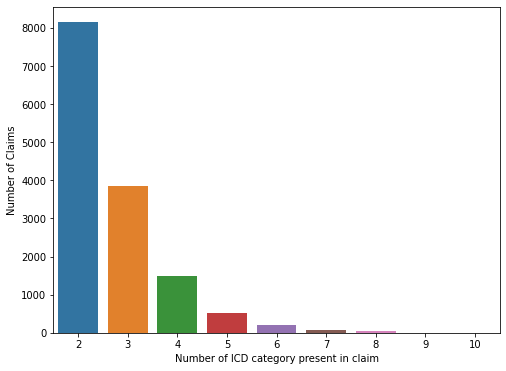

In [186]:
icd_count = pd.DataFrame(claims_icdcombo['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=icd_count)
ax.set_xlabel('Number of ICD category present in claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of ICD category present in claim')

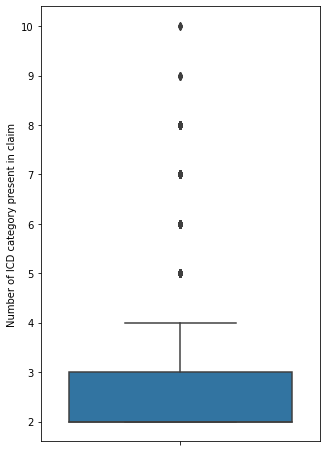

In [192]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=icd_count)
ax.set_ylabel('Number of ICD category present in claim')

We will choose max length of 3.

In [ ]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0, 
                            max_len = 3, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
152,0.415539,(61),1
6,0.397684,(104),1
146,0.231553,(54),1
147,0.219556,(55),1
1370,0.148556,"(61, 104)",2


**Min support is 0 for frequent_itemsets**

##Apriori results pruning

### Association Rule #1 - Confidence

In [154]:
from mlxtend.frequent_patterns import association_rules

# Get frequent item sets with minimum support 0.001
frequent_itemsets1 = apriori(onehot, 
                            min_support = 0.001, 
                            max_len = 3, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

rules_1 = association_rules(frequent_itemsets1, 
                          metric = "confidence", 
                         	min_threshold = 0.65).sort_values('confidence',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(215, 48)",(61),0.003836,0.415539,0.003208,0.836364,2.012719,0.001614,3.571705
13,"(215, 144)",(61),0.001953,0.415539,0.001604,0.821429,1.976778,0.000793,3.272981
15,"(168, 130)",(61),0.001953,0.415539,0.001534,0.785714,1.890831,0.000723,2.727484
1,"(215, 130)",(61),0.015553,0.415539,0.012205,0.784753,1.888519,0.005742,2.715308
3,"(215, 169)",(61),0.006765,0.415539,0.005301,0.783505,1.885515,0.002489,2.699653
11,"(131, 215)",(61),0.002790,0.415539,0.002162,0.775000,1.865047,0.001003,2.597604
4,"(170, 215)",(61),0.005998,0.415539,0.004533,0.755814,1.818876,0.002041,2.393506
7,"(167, 215)",(61),0.004324,0.415539,0.003208,0.741935,1.785477,0.001411,2.264786
10,"(215, 107)",(61),0.003069,0.415539,0.002232,0.727273,1.750191,0.000957,2.143023
0,(215),(61),0.079230,0.415539,0.057470,0.725352,1.745569,0.024546,2.128037


In [155]:
# Checking ICD Category #61
icd_categories = pd.read_csv('/content/icd_category_categorydes.csv')
icd_categories[icd_categories['icdcategory']==61]

,icdcategory,ICD CATEGORY
60,61,Metabolic disorders (E70-E88)


Metabolic disorders is a frequent consequent ICD

### Association Rule #2 - Zhang (trial from DataCamp)

**Zhang's rule**

In [156]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

In [157]:
# Generate the initial set of rules using a minimum lift of 1.00 on frequent_itemsets (all combinations)
rules_2 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# Set antecedent support to 0.01
rules_2 = rules_2[rules_2['antecedent support'] > 0.01]

# Set consequent support to 0.01
rules_2 = rules_2[rules_2['consequent support'] > 0.01]

# Compute Zhang's rule
rules_2['zhang'] = zhangs_rule(rules_2)

# Set the lower bound for Zhang's rule to 0.8
rules_2 = rules_2[rules_2['zhang'] > 0.8].sort_values('zhang',ascending=False)
rules_2

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,
/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:106: RuntimeWarning: invalid value encountered in double_scalars
  "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC)/sC,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
303,(10),(15),0.022597,0.015693,0.004254,0.188272,11.997503,0.003900,1.212607,0.937842
302,(15),(10),0.015693,0.022597,0.004254,0.271111,11.997503,0.003900,1.340949,0.931263
119,(0),(10),0.058516,0.022597,0.009276,0.158522,7.015090,0.007954,1.161531,0.910743
395,(171),(173),0.026294,0.016808,0.003348,0.127321,7.574804,0.002906,1.126636,0.891422
394,(173),(171),0.016808,0.026294,0.003348,0.199170,7.574804,0.002906,1.215872,0.882822
118,(10),(0),0.022597,0.058516,0.009276,0.410494,7.015090,0.007954,1.597073,0.877274
141,(169),(15),0.126796,0.015693,0.008230,0.064906,4.136130,0.006240,1.052630,0.868329
721,(112),"(130, 105)",0.028037,0.013809,0.002092,0.074627,5.404040,0.001705,1.065722,0.838462
1584,"(130, 105)",(1),0.013809,0.011717,0.000907,0.065657,5.603475,0.000745,1.057730,0.833043
1585,(1),"(130, 105)",0.011717,0.013809,0.000907,0.077381,5.603475,0.000745,1.068903,0.831280


### Association Rule #3 - Multiple Metrics (trial from DataCamp)

In [158]:
# Recover association rules using a minium support threshold of 0.001
rules_3 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_3['zhang'] = zhangs_rule(rules_3)

# Apply metric thresholds
rules_3 = rules_3[(rules_3['antecedent support'] > 0.002) &
                       (rules_3['consequent support'] > 0.01) &
                       (rules_3['lift'] > 2.50) &
                       (rules_3['zhang'] > 0.80)] 

# Print remaining rule
rules_3.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
210,(113),(0),0.036267,0.058516,0.009625,0.265385,4.535262,0.007503,1.281601,0.808840
211,(0),(113),0.058516,0.036267,0.009625,0.164482,4.535262,0.007503,1.153455,0.827954
226,(10),(0),0.022597,0.058516,0.009276,0.410494,7.015090,0.007954,1.597073,0.877274
227,(0),(10),0.058516,0.022597,0.009276,0.158522,7.015090,0.007954,1.161531,0.910743
261,(169),(15),0.126796,0.015693,0.008230,0.064906,4.136130,0.006240,1.052630,0.868329
568,(15),(10),0.015693,0.022597,0.004254,0.271111,11.997503,0.003900,1.340949,0.931263
569,(10),(15),0.022597,0.015693,0.004254,0.188272,11.997503,0.003900,1.212607,0.937842
706,(173),(171),0.016808,0.026294,0.003348,0.199170,7.574804,0.002906,1.215872,0.882822
707,(171),(173),0.026294,0.016808,0.003348,0.127321,7.574804,0.002906,1.126636,0.891422
852,(42),(171),0.009555,0.026294,0.002790,0.291971,11.104184,0.002539,1.375235,0.918722


### Association Rule #4 - Lift & Zhang

In [159]:
# Recover association rules using a minium support threshold of 0.001
rules_4 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_4['zhang'] = zhangs_rule(rules_4)

# Apply metric thresholds
rules_4 = rules_4[(rules_4['lift'] > 1.00) &
                  (rules_4['zhang'] > 0.50)] 

# Print remaining rule
rules_4.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1086,(156),(224),0.010322,0.007253,0.002232,0.216216,29.808732,0.002157,1.266608,0.976533
1087,(224),(156),0.007253,0.010322,0.002232,0.307692,29.808732,0.002157,1.429535,0.973514
1528,(156),(152),0.010322,0.007114,0.001604,0.155405,21.845125,0.001531,1.175577,0.964176
1529,(152),(156),0.007114,0.010322,0.001604,0.225490,21.845125,0.001531,1.277812,0.961060
2270,(10),"(15, 0)",0.022597,0.003348,0.001046,0.046296,13.829090,0.000971,1.045033,0.949137
...,...,...,...,...,...,...,...,...,...,...
396,"(130, 104)",(167),0.049310,0.058307,0.005510,0.111740,1.916417,0.002635,1.060155,0.502995
2161,"(215, 48)",(130),0.003836,0.145278,0.001116,0.290909,2.002427,0.000559,1.205377,0.502534
2167,"(169, 130)",(113),0.015553,0.036267,0.001116,0.071749,1.978337,0.000552,1.038224,0.502338
720,(61),"(54, 144)",0.415539,0.005580,0.003278,0.007889,1.413826,0.000959,1.002327,0.500802


### Association Rule #5 - Confidence & Zhang


In [168]:
# Recover association rules using a minium support threshold of 0.001
rules_5 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_5['zhang'] = zhangs_rule(rules_5)

# Apply metric thresholds
rules_5 = rules_5[(rules_5['confidence'] > 0.20) &
                  (rules_5['zhang'] > 0.80)] 

# Print remaining rule
rules_5.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1086,(156),(224),0.010322,0.007253,0.002232,0.216216,29.808732,0.002157,1.266608,0.976533
1087,(224),(156),0.007253,0.010322,0.002232,0.307692,29.808732,0.002157,1.429535,0.973514
1529,(152),(156),0.007114,0.010322,0.001604,0.225490,21.845125,0.001531,1.277812,0.961060
995,(172),(173),0.009973,0.016808,0.002441,0.244755,14.561414,0.002273,1.301818,0.940707
568,(15),(10),0.015693,0.022597,0.004254,0.271111,11.997503,0.003900,1.340949,0.931263
2267,"(15, 0)",(10),0.003348,0.022597,0.001046,0.312500,13.829090,0.000971,1.421677,0.930805
1917,"(10, 169)",(15),0.006138,0.015693,0.001255,0.204545,13.034545,0.001159,1.237415,0.928982
852,(42),(171),0.009555,0.026294,0.002790,0.291971,11.104184,0.002539,1.375235,0.918722
1965,(128),(124),0.005928,0.020993,0.001255,0.211765,10.087317,0.001131,1.242024,0.906238
226,(10),(0),0.022597,0.058516,0.009276,0.410494,7.015090,0.007954,1.597073,0.877274


## Plotting Rule #5

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

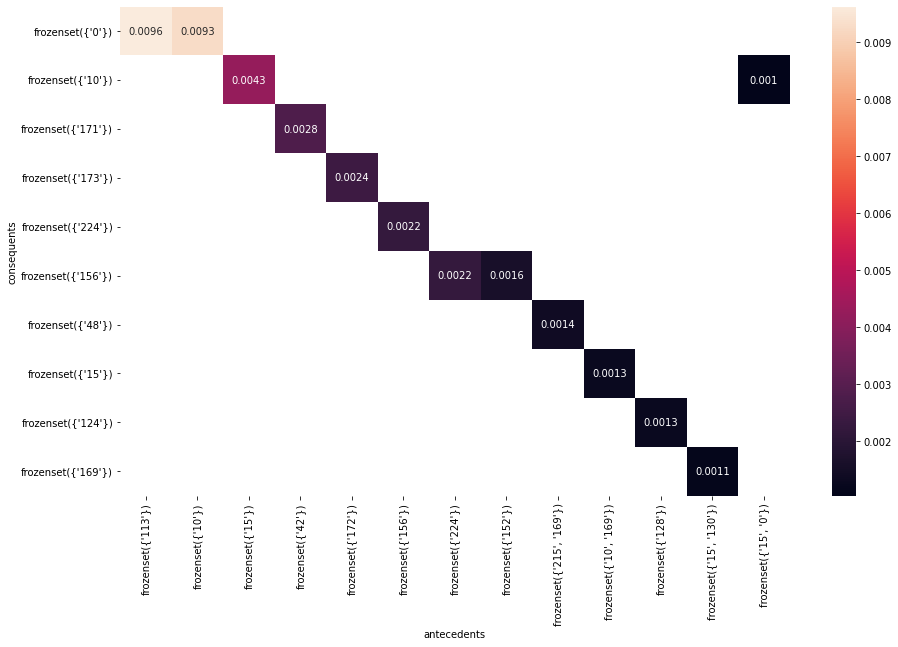

In [193]:
support_table = rules_5.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(15,9))
sns.heatmap(support_table,annot=True)

Heatmap: See association

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

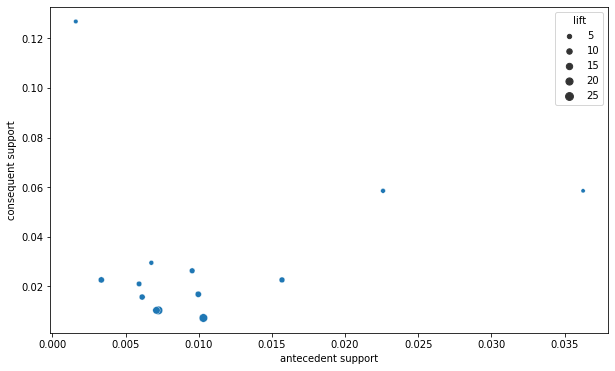

In [194]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules_5)

Scatterplot 


*   Identify natural thresholds of data
*   Use findings to prune



In [195]:
# Converting rules to coordinates
rules_5['antecedents'] = rules_5['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules_5['consequents'] = rules_5['consequents'].apply(lambda consequent: list(consequent)[0])
rules_5['rule'] = rules_5.index

# Define coordinates and label 
coords = rules_5[['antecedents','consequents','rule']]
coords.head()

,antecedents,consequents,rule
210,113,0,210
226,10,0,226
568,15,10,568
852,42,171,852
995,172,173,995


<AxesSubplot:>

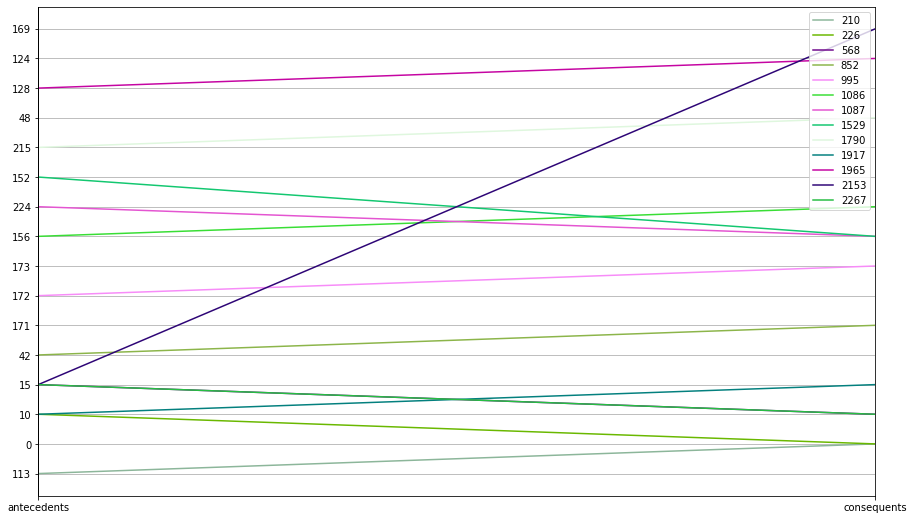

In [196]:
# Generate Parallel coordinates plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,9))
parallel_coordinates(coords,'rule')